In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Steiner Trees

## Introduction
The Steiner Tree Problem is a classic NP-hard problem in combinatorial optimization and graph theory. It seeks the shortest interconnecting network (tree) covering a specified subset of vertices (terminals) within a graph. Formally, given a weighted graph G = (V, E) and a subset S ⊆ V, the Steiner Tree Problem aims to find a tree T = (V<sub>T</sub>, E<sub>T</sub>) such that S ⊆ V<sub>T</sub> and the total weight of E<sub>T</sub> is minimized.




A demonstration of the Steiner Tree Problem is shown below. The graph G with vertices V = {1, 2, 3, 4, 5, 6} and edges E = {(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)} is given. The terminals S = {1, 4, 5} are specified. The Steiner Tree T is shown in red, which connects the terminals and minimizes the total edge weight.

In [2]:
# Create a weighted graph
G = nx.Graph()
edges = [
    (1, 2, 2), (1, 3, 3), (2, 3, 1), (2, 4, 4), (3, 4, 2),
    (3, 5, 5), (4, 5, 3), (4, 6, 2), (5, 6, 1)
]
G.add_weighted_edges_from(edges)

In [3]:
# Define the subset S of vertices (terminals)
S = {1, 4, 5}

In [4]:
# Find the Steiner Tree
steiner_tree = nx.algorithms.approximation.steiner_tree(G, S)

In [5]:
def draw_graph(G, steiner_tree, pos=None, title="Steiner Tree Example"):
    if pos is None:
        pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 4))

    # Draw all nodes and edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

    # Highlight the Steiner Tree
    nx.draw_networkx_edges(G, pos, edgelist=steiner_tree.edges(), width=2, edge_color='r')
    nx.draw_networkx_nodes(G, pos, nodelist=steiner_tree.nodes(), node_color='r', node_size=500)

    plt.title(title)
    plt.show()

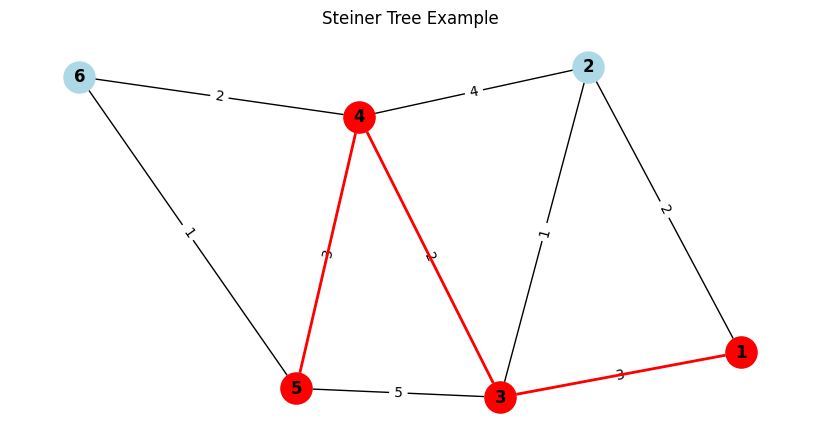

In [6]:
draw_graph(G, steiner_tree)

Relation to Other Problems:
- The Shortest Path Problem is a special case of the Steiner Tree Problem, where the terminals are two vertices.
- The Steiner Tree Problem is a generalization of the Minimum Spanning Tree Problem, where all vertices are terminals.
- The Steiner Tree Problem is a special case of the Steiner Forest Problem, where multiple trees are allowed to cover the terminals.


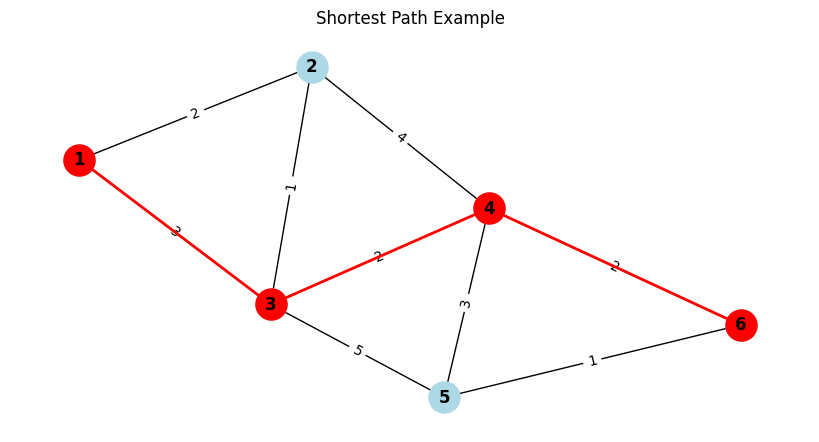

In [7]:
# Shortest path between two nodes {1, 6}
S = {1, 6}
steiner_tree = nx.algorithms.approximation.steiner_tree(G, S)
draw_graph(G, steiner_tree, title="Shortest Path Example")

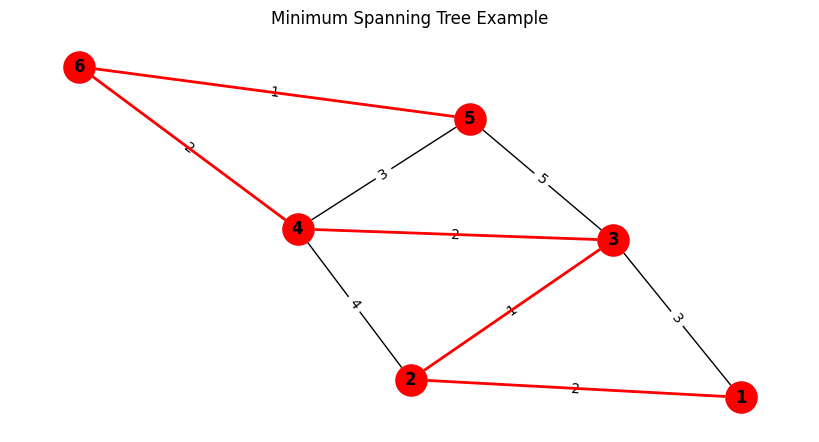

In [8]:
# Minimum spanning tree
S = {1, 2, 3, 4, 5, 6}
steiner_tree = nx.algorithms.approximation.steiner_tree(G, S)
draw_graph(G, steiner_tree, title="Minimum Spanning Tree Example")

In [9]:
def steiner_tree_brute_force(G, terminals):
    min_tree = None
    min_weight = float('inf')

    for subset in itertools.chain.from_iterable(itertools.combinations(G.nodes, r) for r in range(len(G.nodes)+1)):
        if set(terminals).issubset(subset):
            subgraph = G.subgraph(subset)
            if nx.is_connected(subgraph):
                tree = nx.minimum_spanning_tree(subgraph)
                weight = tree.size(weight='weight')
                if weight < min_weight:
                    min_tree = tree
                    min_weight = weight

    return min_tree, min_weight

In [10]:
S = {1, 4, 5}

In [11]:
tree, weight = steiner_tree_brute_force(G, S)
print("Exact Steiner Tree:", tree.edges(data=True))
print("Total Weight:", weight)

Exact Steiner Tree: [(1, 3, {'weight': 3}), (3, 4, {'weight': 2}), (4, 5, {'weight': 3})]
Total Weight: 8.0


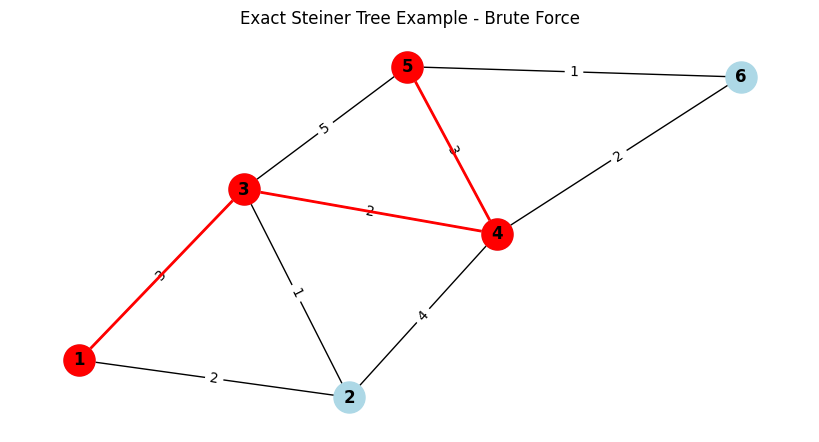

In [12]:
draw_graph(G, tree, title="Exact Steiner Tree Example - Brute Force")

In [13]:
def steiner_tree_dfs(graph, terminals:set):
    def dfs(graph, current, visited, terminals, tree_edges):
        visited.add(current)
        if current in terminals:
            terminals.remove(current)
        
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                tree_edges.append((current, neighbor, graph[current][neighbor]['weight']))
                dfs(graph, neighbor, visited, terminals, tree_edges)
                if not terminals:
                    return
    
    visited = set()
    tree_edges = []
    list_terminals = list(terminals)
    initial_terminal = list_terminals[0]
    
    dfs(graph, initial_terminal, visited, terminals, tree_edges)
    
    return tree_edges

In [14]:
steiner_tree_edges = steiner_tree_dfs(G, S.copy())

In [15]:
steiner_tree_edges
dfs_steiner_tree = nx.Graph()
dfs_steiner_tree.add_weighted_edges_from(steiner_tree_edges)

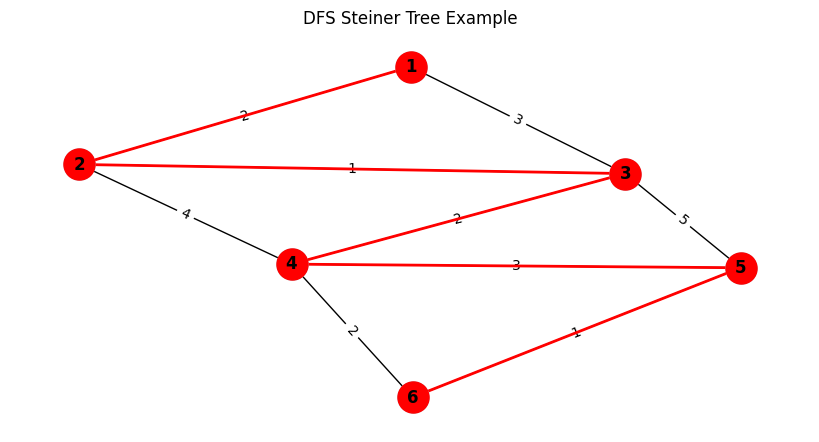

In [16]:
draw_graph(G, dfs_steiner_tree, title="DFS Steiner Tree Example")

Schäfer, G. (2008). Steiner Forest. In: Kao, MY. (eds) Encyclopedia of Algorithms. Springer, Boston, MA. https://doi.org/10.1007/978-0-387-30162-4_402